In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Autoreload of the files
%load_ext autoreload
%autoreload 2

In [2]:
path = '/Users/gaspardvilla/Local/NAT/nat_ada'
# Create the data folder if it doesn't exist
os.makedirs(path, exist_ok=True)
os.makedirs(f"{path}/slides_images", exist_ok=True)
os.makedirs(f"{path}/slides_images/12_05_2025", exist_ok=True)

In [3]:
revenues = pd.read_csv(f"{path}/data/revenue_data.csv")
revenues.head(10)

,Age,Family_Size,Education_Level,Annual_Revenue_CHF
0,21,No family,Intermediate,141846.916446
1,22,No family,Intermediate,68135.056089
2,48,Medium,Intermediate,129151.322731
3,12,No family,Intermediate,147114.638236
4,37,Small,Intermediate,39145.262293
5,19,No family,Basic,83275.129181
6,15,No family,Basic,77341.847335
7,52,Small,Intermediate,353536.547647
8,53,Small,Intermediate,95764.030479
9,62,Medium,Basic,41156.202620


# Histograms
***

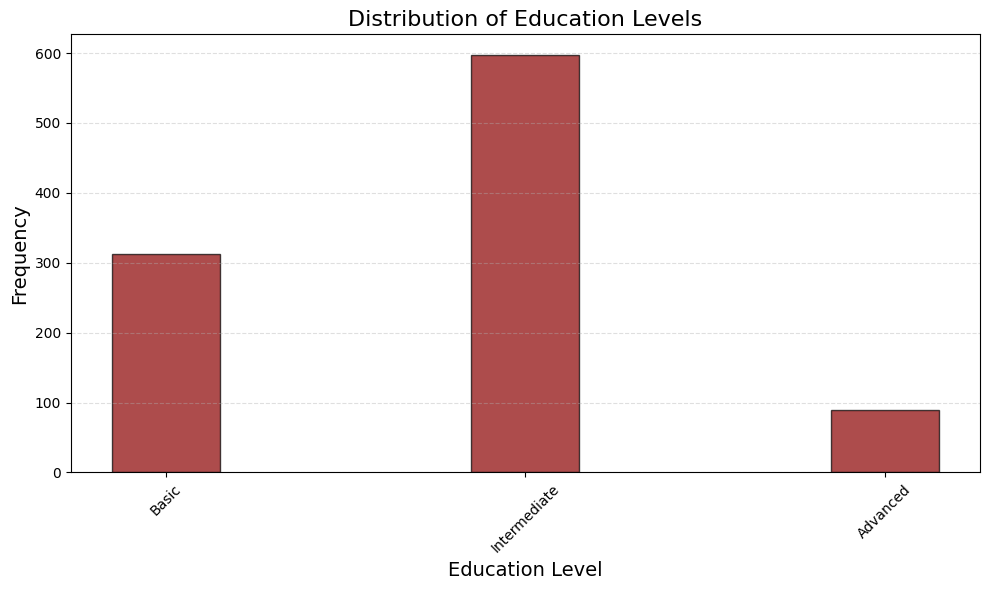

In [4]:
plt.figure(figsize=(10, 6))
education_counts = revenues["Education_Level"].value_counts()
plt.bar(['Basic', 'Intermediate', 'Advanced'], education_counts[['Basic', 'Intermediate', 'Advanced']], 
        edgecolor='black', alpha=0.7, width = 0.3, color = "darkred")
plt.title('Distribution of Education Levels', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha = 0.4)
plt.tight_layout()
plt.savefig(f"{path}/slides_images/12_05_2025/education_level.png")
plt.show()

# Density / count values plots
***

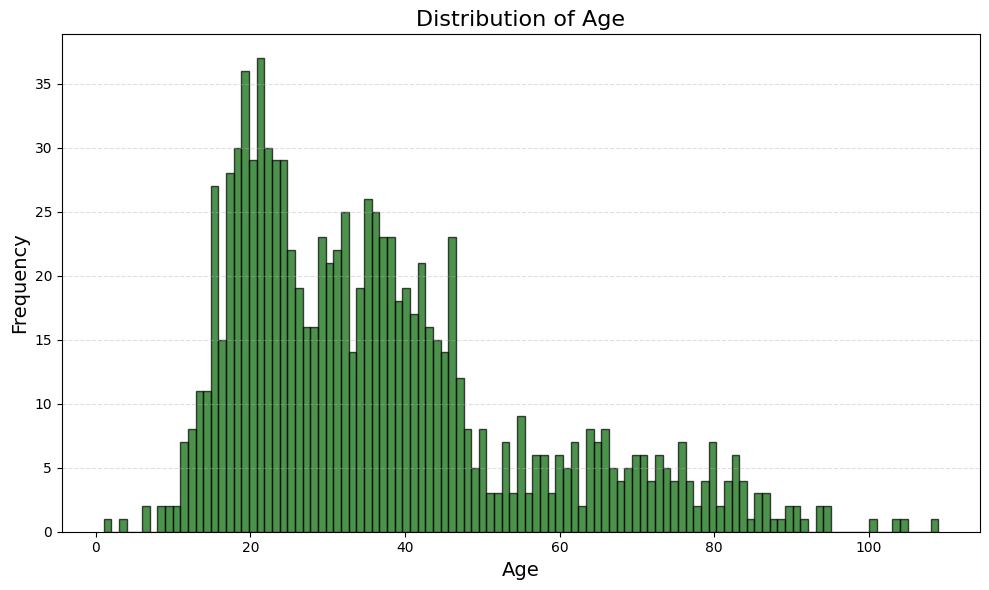

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(revenues["Age"], bins = 109,edgecolor='black', alpha=0.7, color = "darkgreen")
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha = 0.4)
plt.tight_layout()
plt.savefig(f"{path}/slides_images/12_05_2025/age.png")
plt.show()

# Boxplots of the revenues
***

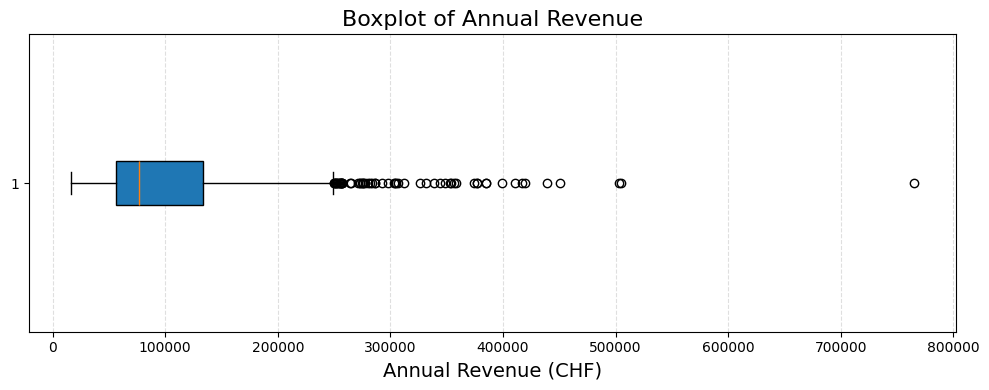

In [6]:
# Boxplots of the revenues
plt.figure(figsize=(10, 4))
plt.boxplot(revenues["Annual_Revenue_CHF"], vert=False, patch_artist=True)
plt.title('Boxplot of Annual Revenue', fontsize=16)
plt.xlabel('Annual Revenue (CHF)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig(f"{path}/slides_images/12_05_2025/annual_revenue_boxplot.png")
plt.show()

# Bar plots of the age regarding the family size
***

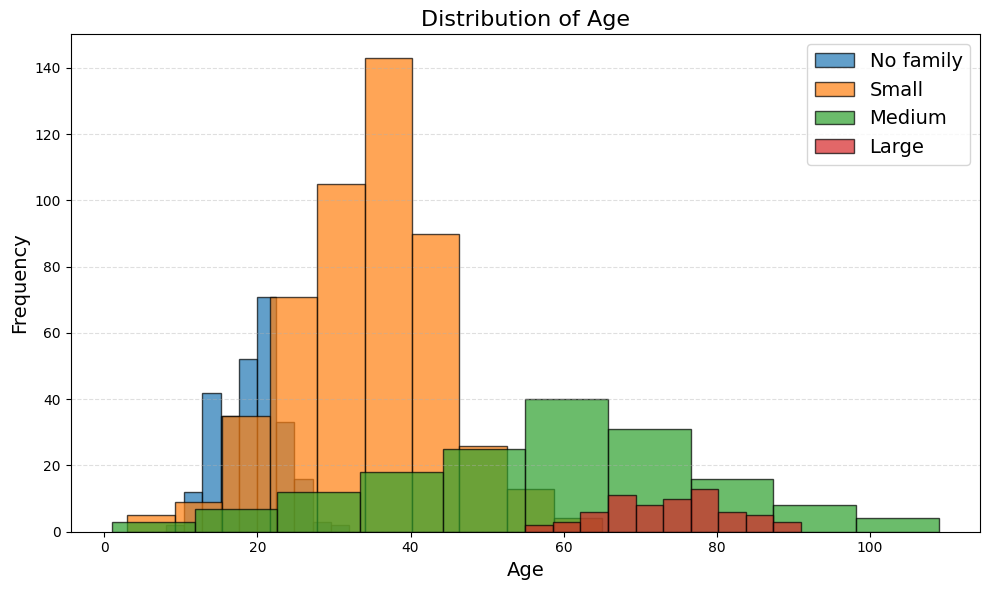

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(revenues["Age"][revenues["Family_Size"] == "No family"], edgecolor='black', alpha=0.7)
plt.hist(revenues["Age"][revenues["Family_Size"] == "Small"], edgecolor='black', alpha=0.7)
plt.hist(revenues["Age"][revenues["Family_Size"] == "Medium"], edgecolor='black', alpha=0.7)
plt.hist(revenues["Age"][revenues["Family_Size"] == "Large"], edgecolor='black', alpha=0.7)
plt.title('Distribution of Age', fontsize=16)
plt.legend(['No family', 'Small', 'Medium', 'Large'], fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha = 0.4)
plt.tight_layout()
plt.savefig(f"{path}/slides_images/12_05_2025/age_family_size.png")
plt.show()

# Boxplots of the revenues regarding the education level
***


/var/folders/dc/28gdnyt16qg7f_cvxzb49rxc0000gn/T/ipykernel_13656/3159512962.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([revenues["Annual_Revenue_CHF"][revenues["Education_Level"] == "Basic"],


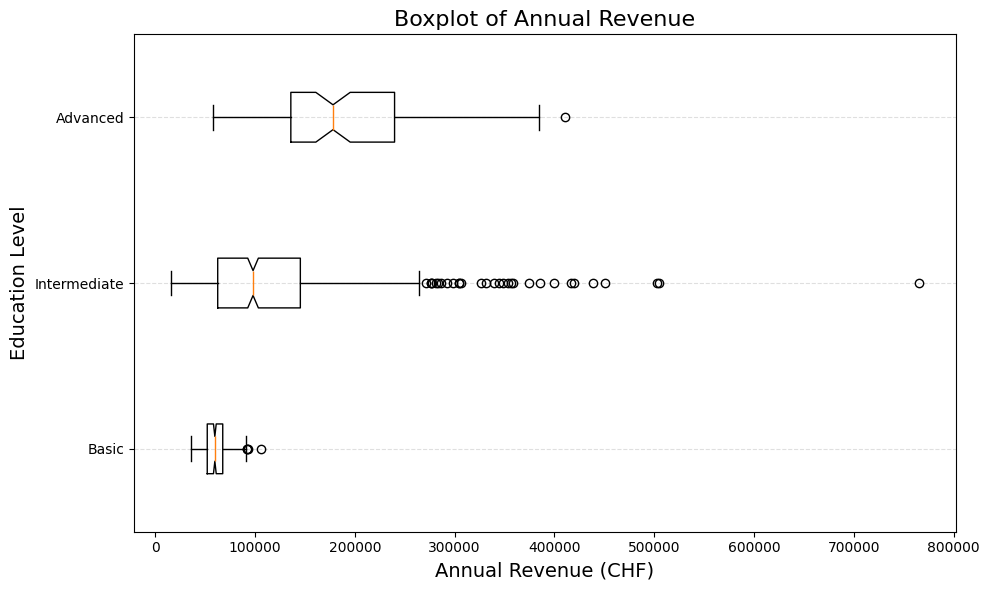

In [8]:
# Boxplots of the revenues regarding the education level
plt.figure(figsize=(10, 6))
plt.boxplot([revenues["Annual_Revenue_CHF"][revenues["Education_Level"] == "Basic"], 
             revenues["Annual_Revenue_CHF"][revenues["Education_Level"] == "Intermediate"], 
             revenues["Annual_Revenue_CHF"][revenues["Education_Level"] == "Advanced"]], 
            labels = ["Basic", "Intermediate", "Advanced"], vert = False, notch=True)
plt.title('Boxplot of Annual Revenue', fontsize=16)
plt.ylabel('Education Level', fontsize=14)
plt.xlabel('Annual Revenue (CHF)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha = 0.4)
plt.tight_layout()
plt.savefig(f"{path}/slides_images/12_05_2025/annual_revenue_vs_education_level_boxplot.png")
plt.show()

# Scatter plots of the revenues regarding the ages with colors as family size
***

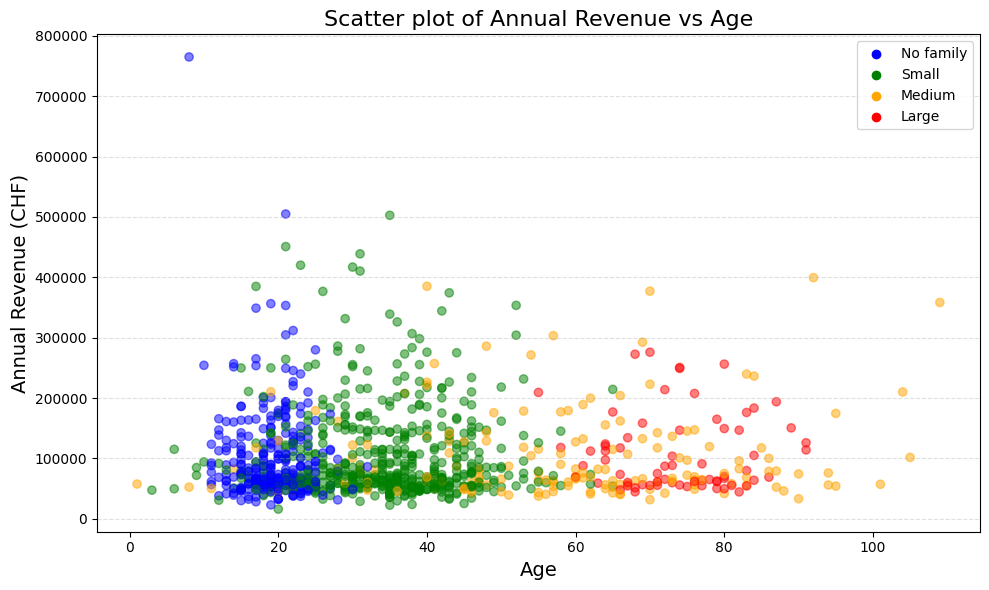

In [9]:
# Scatter plots of the revenues regarding the ages with colors as family size
plt.figure(figsize=(10, 6))

# Create a dictionary to map family sizes to colors
family_colors = {
    'No family': 'blue',
    'Small': 'green',
    'Medium': 'orange',
    'Large': 'red'
}

# Create a list of colors based on family size
colors = [family_colors[size] for size in revenues["Family_Size"]]

# Create the scatter plot
plt.scatter(revenues["Age"], revenues["Annual_Revenue_CHF"], 
            c=colors, alpha=0.5)

# Add legend
for family, color in family_colors.items():
    plt.scatter([], [], c=color, label=family)
plt.legend()

plt.title('Scatter plot of Annual Revenue vs Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Annual Revenue (CHF)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()  
plt.savefig(f"{path}/slides_images/12_05_2025/age_revenue_family_size.png")
plt.show()

# Density plot of the revenues regarding the ages with colors as family size
***

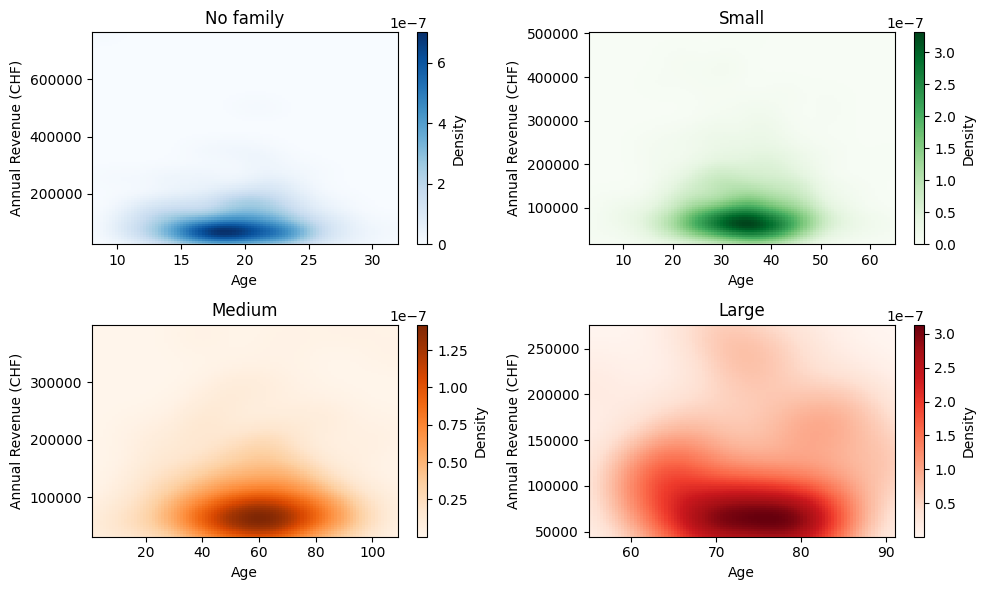

In [10]:
def plot_kde(rev, family_size, ax, color):
   age_grid = np.linspace(rev["Age"].min(), rev["Age"].max(), 100)
   revenue_grid = np.linspace(rev["Annual_Revenue_CHF"].min(), rev["Annual_Revenue_CHF"].max(), 100)
   age_grid, revenue_grid = np.meshgrid(age_grid, revenue_grid)

   # Calculate KDE
   k = gaussian_kde([rev["Age"], rev["Annual_Revenue_CHF"]])
   zi = k(np.vstack([age_grid.ravel(), revenue_grid.ravel()])).reshape(age_grid.shape)

   # Green colormap
   ax.pcolormesh(age_grid, revenue_grid, zi, cmap=color)
   ax.set_title(family_size)
   ax.set_xlabel('Age')
   ax.set_ylabel('Annual Revenue (CHF)')
   ax.set_xlim([rev["Age"].min(), rev["Age"].max()])
   ax.set_ylim([rev["Annual_Revenue_CHF"].min(), rev["Annual_Revenue_CHF"].max()])

   return ax


# Create a grid of points for the KDE
age_grid = np.linspace(revenues["Age"].min(), revenues["Age"].max(), 100)
revenue_grid = np.linspace(revenues["Annual_Revenue_CHF"].min(), revenues["Annual_Revenue_CHF"].max(), 100)
age_grid, revenue_grid = np.meshgrid(age_grid, revenue_grid)

# Calculate KDE
k = gaussian_kde([revenues["Age"], revenues["Annual_Revenue_CHF"]])
zi = k(np.vstack([age_grid.ravel(), revenue_grid.ravel()])).reshape(age_grid.shape)

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

# Green colormap
axs[0,0] = plot_kde(revenues[revenues['Family_Size'] == 'No family'], 'No family', axs[0,0], "Blues")
axs[0,1] = plot_kde(revenues[revenues['Family_Size'] == 'Small'], 'Small', axs[0,1], "Greens")
axs[1,0] = plot_kde(revenues[revenues['Family_Size'] == 'Medium'], 'Medium', axs[1,0], "Oranges")
axs[1,1] = plot_kde(revenues[revenues['Family_Size'] == 'Large'], 'Large', axs[1,1], "Reds")

# Add colorbar to the first subplot
plt.colorbar(axs[0,0].collections[0], ax=axs[0,0], label="Density")
plt.colorbar(axs[0,1].collections[0], ax=axs[0,1], label="Density")
plt.colorbar(axs[1,0].collections[0], ax=axs[1,0], label="Density")
plt.colorbar(axs[1,1].collections[0], ax=axs[1,1], label="Density")

plt.tight_layout()
plt.savefig(f"{path}/slides_images/12_05_2025/kde_plots.png")
plt.show()

# Time series analysis
***

In [11]:
bm = pd.read_csv(f'{path}/data/bm.csv')
bm_noisy = pd.read_csv(f'{path}/data/bm_noisy.csv')
bm_downsampled = pd.read_csv(f'{path}/data/bm_downsampled.csv')


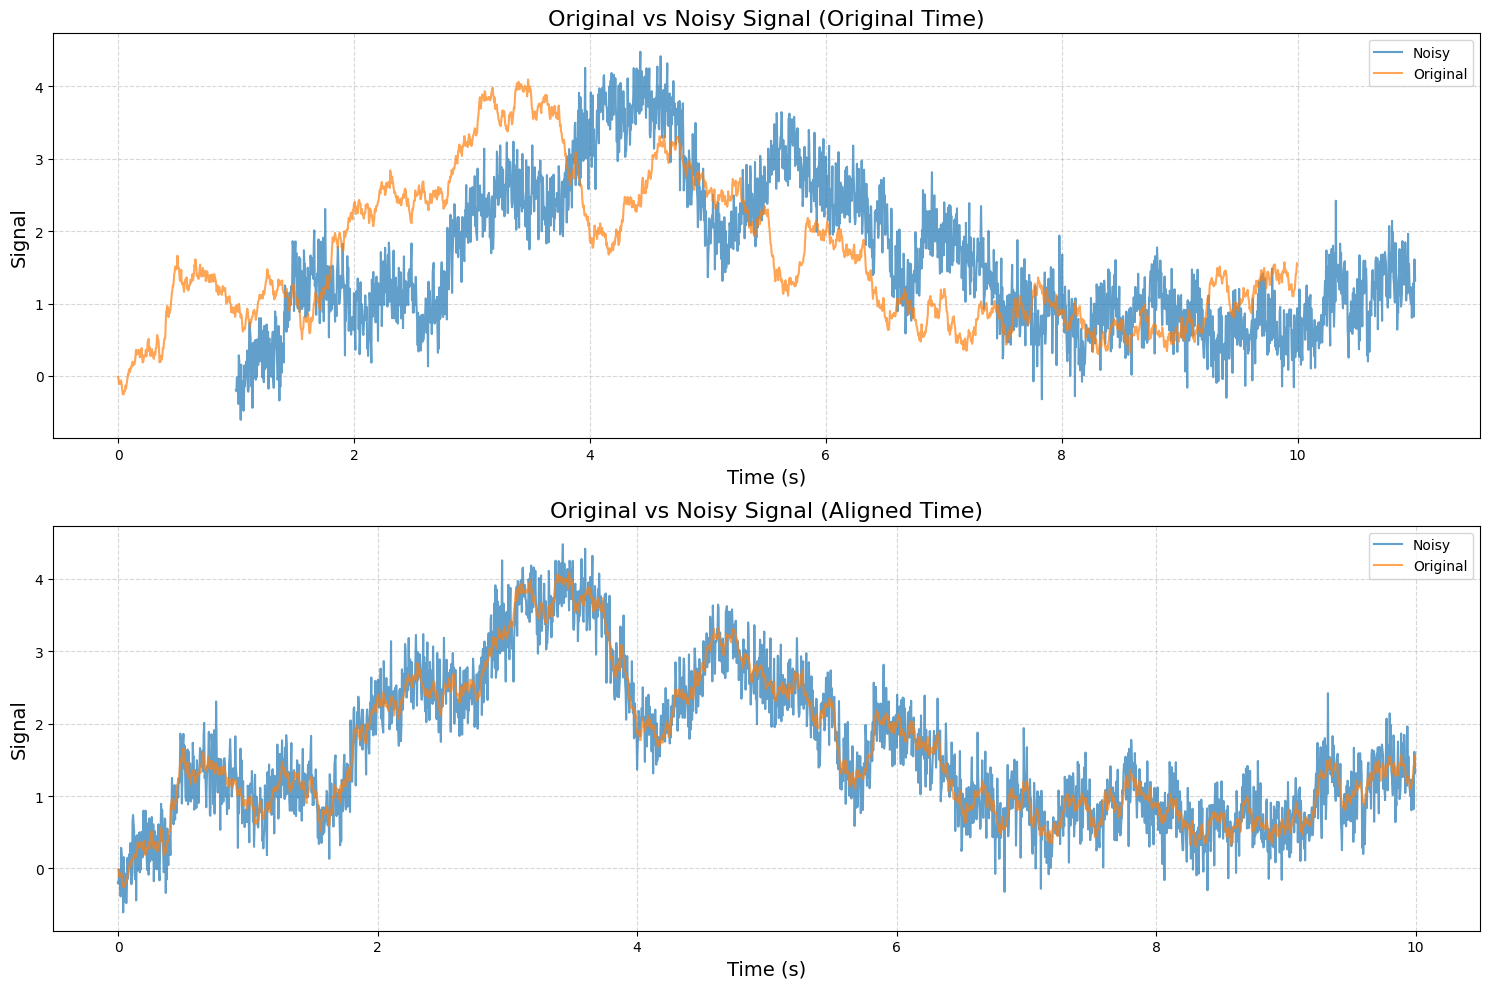

In [12]:
plt.figure(figsize=(15, 10))  # Increased height to accommodate both subplots

# First subplot
plt.subplot(2, 1, 1)
plt.plot(bm_noisy['time'], bm_noisy['signal'], label='Noisy', alpha=0.7)
plt.plot(bm['time'], bm['signal'], label='Original', alpha=0.7)
plt.title('Original vs Noisy Signal (Original Time)', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Signal', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Second subplot
plt.subplot(2, 1, 2)
plt.plot(bm_noisy['time'] - 1, bm_noisy['signal'], label='Noisy', alpha=0.7)
plt.plot(bm['time'], bm['signal'], label='Original', alpha=0.7)
plt.title('Original vs Noisy Signal (Aligned Time)', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Signal', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig(f'{path}/slides_images/12_05_2025/original_vs_noisy.png')
plt.show()

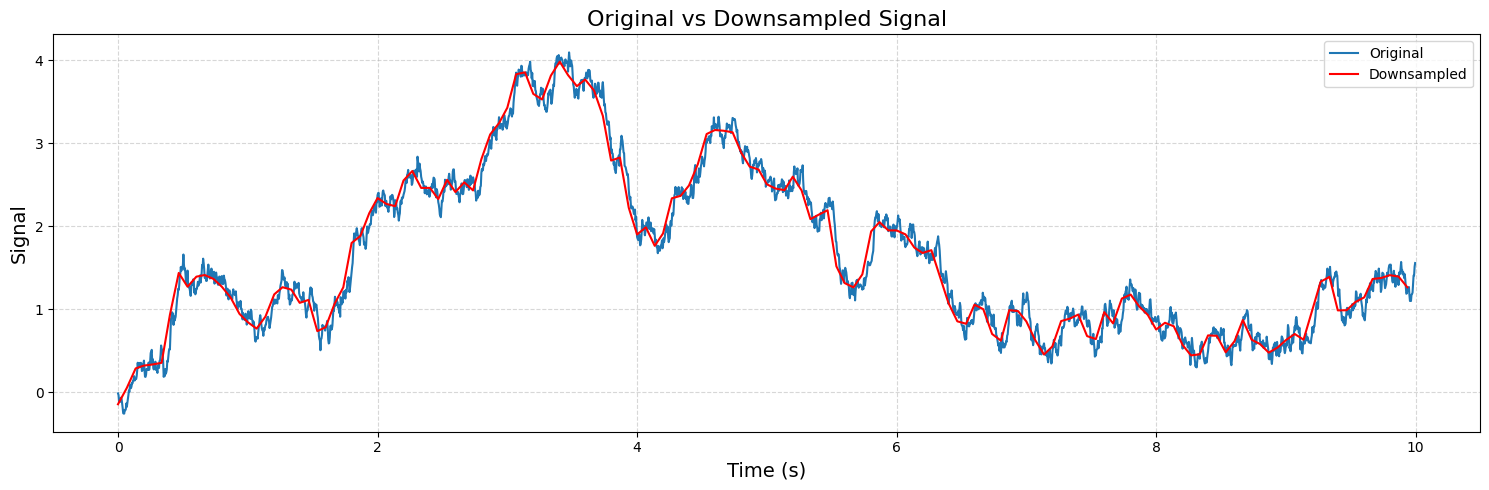

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(bm['time'], bm['signal'], label='Original')
plt.plot(bm_downsampled['time'], bm_downsampled['signal'], label='Downsampled', color='red')
plt.title('Original vs Downsampled Signal', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Signal', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(f'{path}/slides_images/12_05_2025/original_vs_downsampled.png')
plt.show()